In [1]:
import MDAnalysis as mda
import numpy as np
from mdcraft.analysis.polymer import EndToEndVector, Gyradius
from matplotlib import pyplot as plt

/home/kfu/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Load Trajectory

In [8]:
tag = 'poly_sequ_0.8CHI_+8_nchain_1_temp_1'
u = mda.Universe('../data/'+tag+'/input.data', '../data/'+tag+'/drop.lammpstrj',format='LAMMPSDUMP')
ag = u.select_atoms('type 1 or type 2 or type 3')

/home/kfu/.local/lib/python3.10/site-packages/MDAnalysis/coordinates/LAMMPS.py:598: UserWarning: Reader has no dt information, set to 1.0 ps
  ts.data['time'] = step_num * ts.dt


# Radius of Gyration

In [9]:
gyr = Gyradius(ag,n_chains=1,n_monomers=40, unwrap=True)

In [10]:
gyr.run(start=1000)

100%|██████████| 4409/4409 [00:03<00:00, 1233.13it/s]


In [11]:
np.savetxt('../data/'+tag+'/gyr.txt',gyr.results.gyradii)

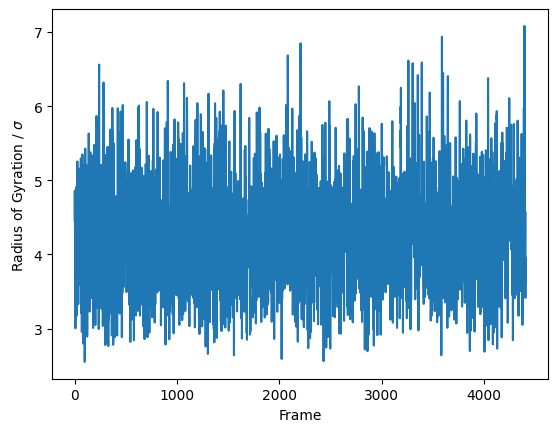

In [12]:
plt.plot(gyr.results.gyradii[0])
plt.xlabel('Frame')
plt.ylabel(f'Radius of Gyration / $\sigma$')
# plt.xlim(0,2000)
plt.savefig('../data/'+tag+'/gyr.pdf')

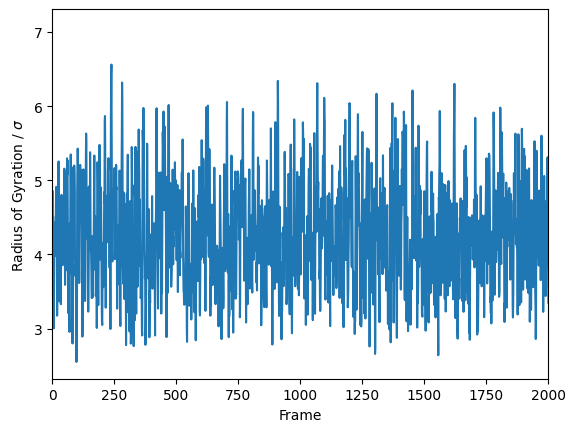

In [13]:
plt.plot(gyr.results.gyradii[0])
plt.xlabel('Frame')
plt.ylabel(f'Radius of Gyration / $\sigma$')
plt.xlim(0,2000)
plt.savefig('../data/'+tag+'/gyr.pdf')

# End-to-end Vector

In [ ]:
e2e = EndToEndVector(ag,n_chains=1,n_monomers=40, unwrap=True)

/home/kfu/.local/lib/python3.10/site-packages/MDAnalysis/coordinates/base.py:725: UserWarning: Reader has no dt information, set to 1.0 ps
  return self.ts.dt


In [ ]:
e2e.run(start=1000)
e2e.save('../data/'+tag+'/e2e')

/home/kfu/.local/lib/python3.10/site-packages/MDAnalysis/coordinates/LAMMPS.py:598: UserWarning: Reader has no dt information, set to 1.0 ps
  ts.data['time'] = step_num * ts.dt
100%|██████████| 10001/10001 [00:01<00:00, 6703.39it/s]
1it [00:00, 684.45it/s]


In [ ]:
abs_e2e = np.zeros(len(e2e._e2e))

for i in range(len(e2e._e2e)):
    abs_e2e[i] = np.linalg.norm(e2e._e2e[i])

abs_e2e

array([11.37302373, 12.22581104, 11.74046475, ..., 10.44642166,
       11.09361762,  8.23964467])

In [ ]:
plt.plot(e2e.results.times,abs_e2e)
plt.xlabel('Frame')
plt.ylabel('End-to-End Distance / $\sigma$')
plt.xlim(0,2000)
plt.savefig('../data/'+tag+'/e2e.pdf')

AttributeError: 'Results' object has no attribute 'times'

In [ ]:
plt.semilogx(e2e.results.times,e2e.results.acf[0][0])
plt.xlabel('Frame')
plt.ylabel(r'$ \rho_{e2e}(t)$')   
plt.xlim(0,3000)

AttributeError: 'Results' object has no attribute 'times'